In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import PercentFormatter
mpl.rcParams['figure.dpi'] = 100

In [44]:
!python3 class_figures.py

In [33]:
!python prep_summary.py

In [34]:
# Settings
max_norm  = 16
results_dir = '../../exp_results/pn3-yolo'
max_query = 1000 # out of 5000
no_images = 1000 # out of 5000

In [21]:
clean_stats = np.load(results_dir + '/clean_preds.npy')

In [35]:
# Clean dataset statistics
clean_stats = np.load(results_dir + '/clean_preds.npy')
names = clean_stats[0]
targets = clean_stats[1].astype(int)
clean_stats = clean_stats[2:].astype(float)
clean_avg = [clean_stats[0].mean(), clean_stats[1].mean(), clean_stats[2].mean(), clean_stats[3].mean()]

In [36]:
# Print format
pf = '%20s' + '%10.4g' * 5
def show_stats(stats):
    print(pf % ('all', targets.sum(), stats[0].mean(), stats[1].mean(), stats[2].mean(), stats[3].mean()))
    for i, c in enumerate(names):
        print(pf % (c, targets[i], stats[0][i], stats[1][i], stats[2][i], stats[3][i]))

In [46]:
show_stats(clean_stats)

                 all      6851    0.7316    0.4898    0.4577    0.5708
              person      2089    0.7809    0.6434    0.6113    0.7055
             bicycle        39       0.9    0.2308    0.2308    0.3673
                 car       296    0.7169    0.5304    0.4823    0.6097
          motorcycle        88    0.9333    0.4773    0.4754    0.6316
            airplane        14    0.8667    0.9286       0.9    0.8966
                 bus        54         1    0.8148    0.8148     0.898
               train        54    0.9535    0.7593    0.7579    0.8454
               truck        64    0.7667    0.3594    0.3171    0.4894
                boat        68    0.6818    0.4412    0.3605    0.5357
       traffic light        89    0.6104    0.5281    0.4742    0.5663
        fire hydrant        21         1    0.7143    0.7143    0.8333
           stop sign        18    0.9231    0.6667    0.6667    0.7742
       parking meter        13       0.5    0.1538    0.1538    0.2353
      

In [37]:
gba_sum = pd.read_csv('data_summary/summary-%s_%iN%iQ%i.csv' % ('gba', no_images, max_norm, max_query))
per_sum = pd.read_csv('data_summary/summary-%s_%iN%iQ%i.csv' % ('per', no_images, max_norm, max_query))
ran_sum = pd.read_csv('data_summary/summary-%s_%iN%iQ%i.csv' % ('ran', no_images, max_norm, max_query))

gba_sum.drop('Unnamed: 0', axis = 1, inplace = True)
per_sum.drop('Unnamed: 0', axis = 1, inplace = True)
ran_sum.drop('Unnamed: 0', axis = 1, inplace = True)

In [38]:
gba_sum.head(n = 7)

,mPrecision,mRecall,mAP,mF1,sigma,theta,lambd,sides
0,0.733301,0.263155,0.242254,0.359935,0.851323,1.586558,0.669672,5
1,0.722100,0.286691,0.266884,0.388081,0.235567,0.156767,0.963778,8
2,0.726143,0.266802,0.247270,0.364635,0.758183,0.466708,0.697986,6
3,0.738009,0.288730,0.266841,0.386613,0.633825,2.112887,0.687387,1
4,0.728366,0.276361,0.254198,0.376806,0.955126,1.497800,0.783389,4
5,0.721987,0.266491,0.245592,0.366811,0.260247,1.877613,0.649938,4
6,0.750004,0.283799,0.263219,0.383463,0.154278,1.439714,0.409155,4


In [39]:
ran_sum.describe()

,mPrecision,mRecall,mAP,mF1,seed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.696639,0.365143,0.335867,0.456216,499.500000
std,0.007491,0.003026,0.002908,0.003646,288.819436
min,0.672983,0.356234,0.325565,0.445400,0.000000
25%,0.691397,0.363137,0.333918,0.453872,249.750000
50%,0.696935,0.365202,0.335998,0.456348,499.500000
75%,0.701865,0.367141,0.337775,0.458575,749.250000
max,0.719782,0.374474,0.345040,0.466367,999.000000


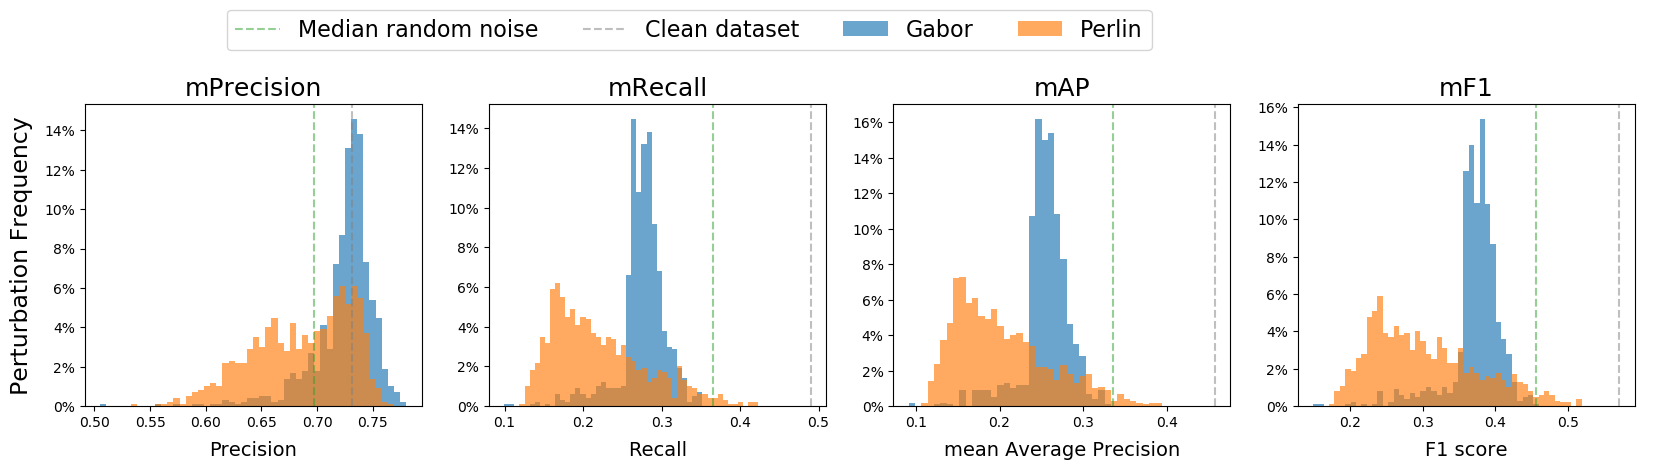

In [45]:
#xlim = (0.2, 1.0)
#ylim = (0, 0.145)

fig = plt.figure(figsize = (20, 4))
plt.subplots_adjust(wspace = 0.2)
plt.axis('off')

num_bins = 50
ax = fig.add_subplot(1, 4, 1)
a = gba_sum['mPrecision']
b = per_sum['mPrecision']
#c = ran_sum['mPrecision']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('mPrecision', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.set_ylabel('Perturbation Frequency', size = 17, labelpad = 8)
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('Precision', size = 14, labelpad = 8)
ax.axvline(x = ran_sum['mPrecision'].median(), color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_avg[0], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

num_bins = 50
ax = fig.add_subplot(1, 4, 2)
a = gba_sum['mRecall']
b = per_sum['mRecall']
#c =  ran_sum['mRecall']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('mRecall', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('Recall', size = 14, labelpad = 8)
ax.axvline(x = ran_sum['mRecall'].median(), color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_avg[1], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)


num_bins = 40
ax = fig.add_subplot(1, 4, 3)
a = gba_sum['mAP']
b = per_sum['mAP']
#c = ran_sum['mAP']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('mAP', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('mean Average Precision', size = 14, labelpad = 8)
ax.axvline(x = ran_sum['mAP'].median(), color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_avg[2], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)


num_bins = 50
ax = fig.add_subplot(1, 4, 4)
a = gba_sum['mF1']
b = per_sum['mF1']
#c = ran_sum['mF1']
data = np.hstack((a,b))
#data = np.hstack((a,b,c))
bins=np.histogram(data, bins = num_bins)[1]

ax.set_title('mF1', size = 18)
ax.hist(a, bins = bins, weights = np.ones(len(a)) / len(a), color = 'C0', alpha = 0.66, label = 'Gabor')
ax.hist(b, bins = bins, weights = np.ones(len(b)) / len(b), color = 'C1', alpha = 0.66, label = 'Perlin')
#ax.hist(c, bins = bins, weights = np.ones(len(c)) / len(c), color = 'C2', alpha = 0.66, label = 'Random')
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax.set_xlabel('F1 score', size = 14, labelpad = 8)
ax.axvline(x = ran_sum['mF1'].median(), color = 'C2', alpha = 0.5, label = 'Median random noise', linestyle = '--')
ax.axvline(x = clean_avg[3], color = 'grey', alpha = 0.5, label = 'Clean dataset', linestyle = '--')
ax.tick_params(labelsize = 10)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

plt.legend(fontsize = 16, bbox_to_anchor=(-0.4, 1.35), ncol = 4)
plt.savefig('figures/yolo.png', dpi = 300, bbox_inches = 'tight')